# Part II - (Bike Trip)
## by (FARIS ALMUQBIL)

## Investigation Overview


> Overall goals of my presentation is focus on results of the dataset and find insight of the data and find interest of how age, gender, and time use of the bike.


## Dataset Overview and Executive Summary

> The dataset contains detailed records of bike-sharing trips, It includes information such as trip duration, station locations, user demographics, and travel patterns. The data has 171,234 entries and 20 columns, providing a rich source for analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
def load_data(filepath):
    return pd.read_csv(filepath)
file = 'ford_bike_new.csv'
df = load_data(file)

In [3]:
def dataframe_info(df):
    print("=" * 40)
    print("DataFrame Info:")
    print("=" * 40)
    df.info()
    print("\nNumber of rows and columns:", df.shape)
    print("=" * 40)

In [4]:
# check for data name and data type
dataframe_info(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             171234 non-null  int64  
 1   start_time               171234 non-null  object 
 2   end_time                 171234 non-null  object 
 3   start_station_id         171234 non-null  float64
 4   start_station_name       171234 non-null  object 
 5   start_station_latitude   171234 non-null  float64
 6   start_station_longitude  171234 non-null  float64
 7   end_station_id           171234 non-null  float64
 8   end_station_name         171234 non-null  object 
 9   end_station_latitude     171234 non-null  float64
 10  end_station_longitude    171234 non-null  float64
 11  bike_id                  171234 non-null  int64  
 12  user_type                171234 non-null  object 
 13  member_birth_year        171234 non-null  f

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_hour
count,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000
mean,697.775559,138.682388,37.770616,-122.351656,136.303672,37.770817,-122.351226,4481.259376,1984.874493,35.125507,13.451587
std,1577.550958,111.702181,0.101242,0.118536,111.418601,0.101147,0.118103,1659.530606,9.969689,9.969689,4.733841
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1920.000000,19.000000,0.000000
25%,322.250000,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3796.000000,1980.000000,28.000000,9.000000
50%,509.000000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397437,4960.000000,1987.000000,33.000000,14.000000
75%,787.000000,239.000000,37.797280,-122.283127,237.000000,37.797320,-122.287610,5505.000000,1992.000000,40.000000,17.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,100.000000,23.000000


In [6]:
# check for null values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
age                        0
age_group                  0
start_hour                 0
start_day                  0
dtype: int64

In [7]:
# check for duplicated values
df.duplicated().sum()

0

In [8]:
# Change data type
# duration_sec to int32
df['duration_sec'] = df['duration_sec'].astype('int32')
# start_time and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# bike_id column to int16
df['bike_id'] = df['bike_id'].astype('int16')

In [9]:
# check for data name and data type
dataframe_info(df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171234 non-null  int32         
 1   start_time               171234 non-null  datetime64[ns]
 2   end_time                 171234 non-null  datetime64[ns]
 3   start_station_id         171234 non-null  float64       
 4   start_station_name       171234 non-null  object        
 5   start_station_latitude   171234 non-null  float64       
 6   start_station_longitude  171234 non-null  float64       
 7   end_station_id           171234 non-null  float64       
 8   end_station_name         171234 non-null  object        
 9   end_station_latitude     171234 non-null  float64       
 10  end_station_longitude    171234 non-null  float64       
 11  bike_id                  171234 non-null  int16         
 12  

In [10]:
# check the result before move
df[['duration_sec', 'start_time', 'end_time', 'bike_id']].dtypes

duration_sec             int32
start_time      datetime64[ns]
end_time        datetime64[ns]
bike_id                  int16
dtype: object

In [11]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_hour
count,171234.000000,171234,171234,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000,171234.000000
mean,697.775559,2019-02-15 21:23:18.418575360,2019-02-15 21:34:56.693093376,138.682388,37.770616,-122.351656,136.303672,37.770817,-122.351226,4481.259376,1984.874493,35.125507,13.451587
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1920.000000,19.000000,0.000000
25%,322.250000,2019-02-08 08:29:10.248999936,2019-02-08 08:39:36.504000,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3796.000000,1980.000000,28.000000,9.000000
50%,509.000000,2019-02-15 22:15:42.629000192,2019-02-15 22:29:58.956000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397437,4960.000000,1987.000000,33.000000,14.000000
75%,787.000000,2019-02-22 11:19:05.106000128,2019-02-22 11:33:05.178749952,239.000000,37.797280,-122.283127,237.000000,37.797320,-122.287610,5505.000000,1992.000000,40.000000,17.000000
max,84548.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,100.000000,23.000000
std,1577.550958,NaN,NaN,111.702181,0.101242,0.118536,111.418601,0.101147,0.118103,1659.530606,9.969689,9.969689,4.733841


## (Most commen daya usage)

> In my country, the week starts on Sunday. I see that Sunday has the least bike usage. On Monday and Tuesday, bike usage starts to go up. The highest usage is on Thursday, which is the last workday. During the weekend, bike usage goes down because people do other activities.

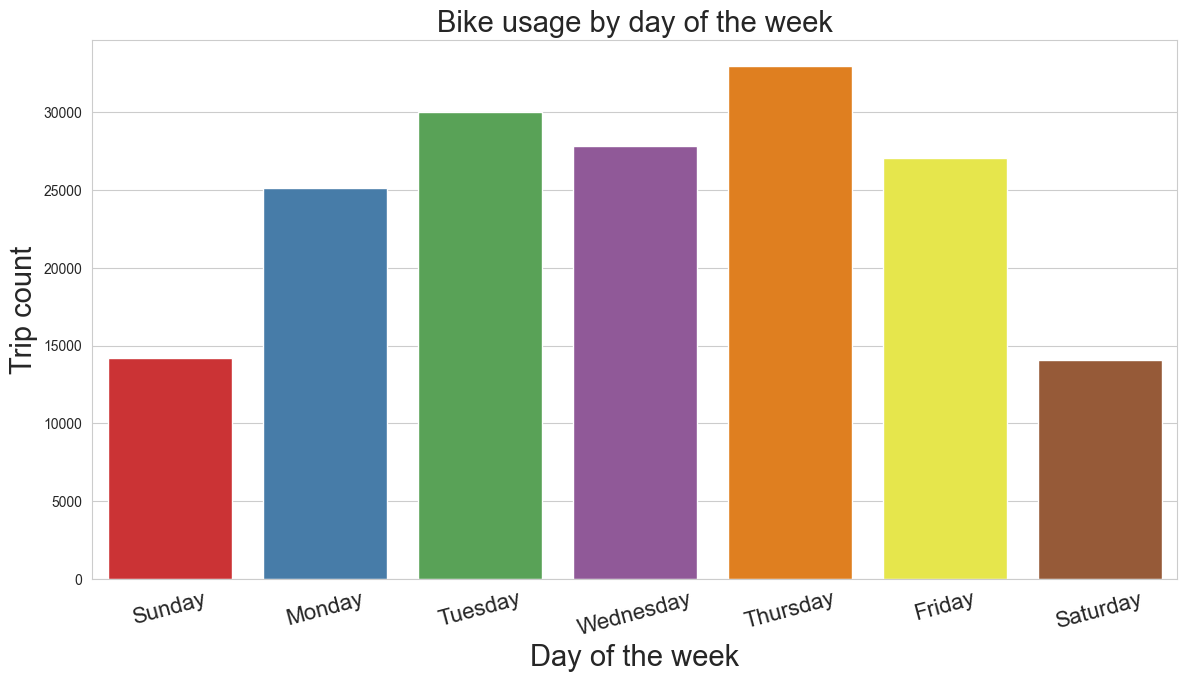

In [12]:
#custom color palette
palette = sns.color_palette("Set1")
#plot bike usage by day of the week
plt.figure(figsize=(14, 7));
sns.countplot(data=df,x='start_day',order=['Sunday' ,'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    palette=palette);
plt.title('Bike usage by day of the week', fontsize=21);
plt.xlabel('Day of the week', fontsize=21);
plt.ylabel('Trip count', fontsize=21);
plt.xticks(fontsize=16, rotation=15);

## (Commen gender)

> There are 3 times more males than females using bikes. Maybe males can handle bad weather better, but females might not like this difficulty.

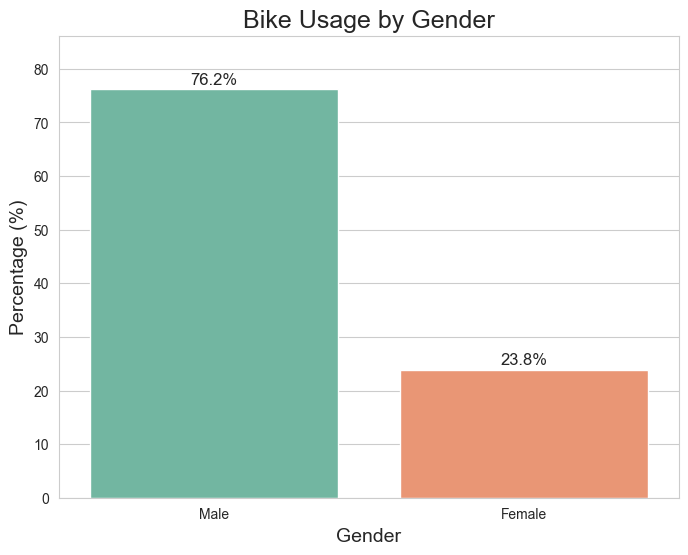

In [13]:
#percentage for each gender
gender_counts = df['member_gender'].value_counts(normalize=True) * 100
#color palette
palette = sns.color_palette("Set2")
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index,y=gender_counts.values,palette=palette)

#percentage labels
for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('Bike Usage by Gender', fontsize=18);
plt.xlabel('Gender', fontsize=14);
plt.ylabel('Percentage (%)', fontsize=14);
plt.ylim(0, gender_counts.max() + 10);

## (Most age use)

> Age between 30-40 are using bike, which is very good while their age has more responsibilities with them families, and age between 18-30 has good number while when go further the number is decreasing until 60 and above.

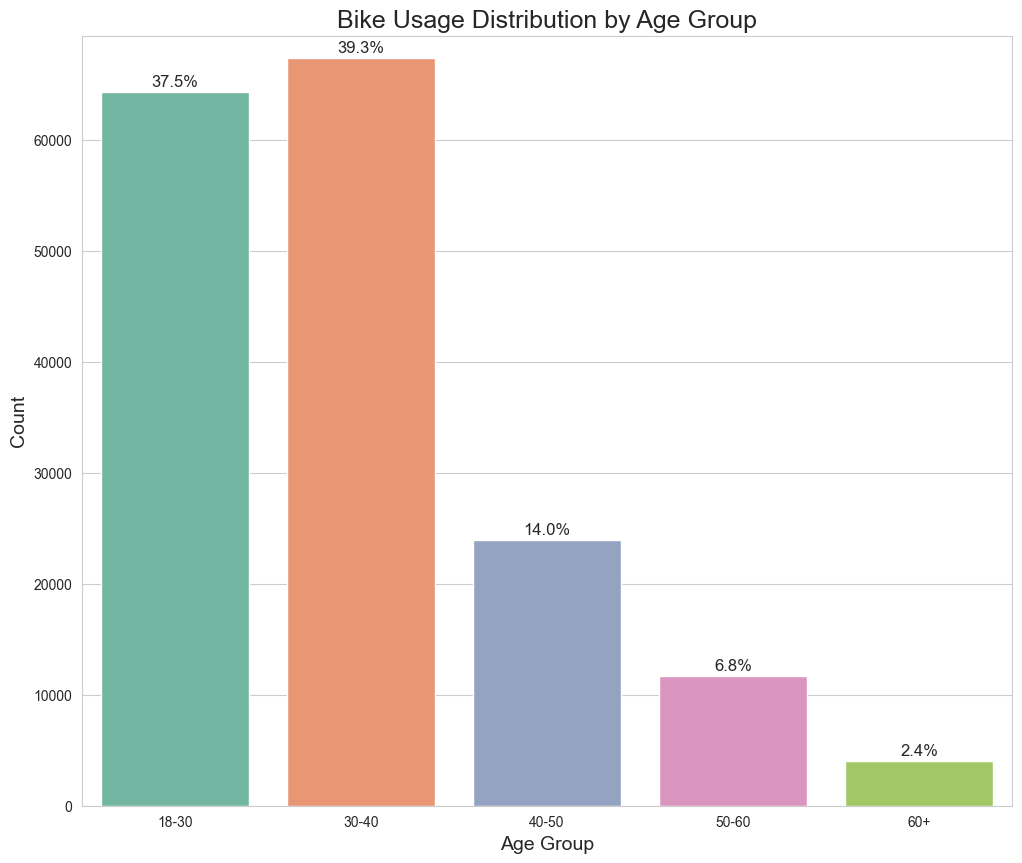

In [14]:
#order based on the available categories in the data
correct_age_order = ['18-30', '30-40', '40-50', '50-60', '60+']

plt.figure(figsize=(12, 10))
sns.countplot(data=df,x='age_group',order=correct_age_order,palette=palette)
#total count for percentages
total_count = len(df)
age_group_counts = df['age_group'].value_counts()

#percentage labels
for i, age_group in enumerate(correct_age_order):
    if age_group in age_group_counts.index:  # Check if the group exists in the data
        count = age_group_counts[age_group]
        percentage = (count / total_count) * 100
        plt.text(i, count + 500, f'{percentage:.1f}%', ha='center', fontsize=12)

plt.title('Bike Usage Distribution by Age Group', fontsize=18);
plt.xlabel('Age Group', fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.ylim(0, age_group_counts.max() + 2000);

In [15]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_II_explanatory_template.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 467005 bytes to Part_II_explanatory_template.html
